In [ ]:
import cv2

In [ ]:
img = cv2.imread("in-words-images-whiteBG/10.png")

In [ ]:
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img2gray

In [ ]:
 ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)

In [ ]:
image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)

In [ ]:
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)

In [ ]:
new_img

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

In [ ]:
dilated = cv2.dilate(new_img, kernel, iterations=9)

In [ ]:
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
def captch_ex(file_name):
    img = cv2.imread(file_name)

    img_final = cv2.imread(file_name)
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation

    # for cv2.x.x

    #image, contours, _= cv2.findContours(skin_ycrcb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # get contours

    # for cv3.x.x comment above line and uncomment line below

    image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)


    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

        '''
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg' 
        cv2.imwrite(s , cropped)
        index = index + 1

        '''
    # write original image with added contours to disk
    cv2.imshow('captcha_result', img)
    cv2.waitKey()

In [ ]:
file_name = 'in-words-images-whiteBG/10.png'

In [ ]:
captch_ex(file_name)

In [ ]:
import cv2

im_chq = cv2.imread('final-image.jpg')

In [ ]:
height,width = im_chq.shape[:2]

In [ ]:
height

In [ ]:
width

In [ ]:
im_chq_gray = cv2.cvtColor(im_chq, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(im_chq_gray, 180, 255, cv2.THRESH_BINARY)
image_final = cv2.bitwise_and(im_chq_gray, im_chq_gray, mask=mask)

In [ ]:
im_chq_gray

In [ ]:
cv2.imshow('chq_gray_image',im_chq)

In [ ]:
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)

In [ ]:
cv2.imshow('new_img',new_img)

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [2]:
img_raw = cv2.imread("final-image.jpg",-1)

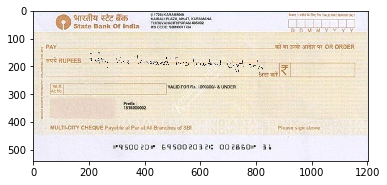

In [3]:
plt.imshow(img_raw)

In [4]:
img_raw

array([[[186, 183, 192],
        [187, 184, 193],
        [188, 185, 194],
        ..., 
        [239, 239, 245],
        [237, 237, 243],
        [235, 235, 241]],

       [[198, 195, 204],
        [199, 196, 205],
        [200, 197, 206],
        ..., 
        [236, 236, 242],
        [235, 235, 241],
        [234, 232, 238]],

       [[217, 214, 223],
        [217, 214, 223],
        [217, 214, 223],
        ..., 
        [231, 231, 237],
        [232, 232, 238],
        [229, 227, 233]],

       ..., 
       [[244, 242, 254],
        [243, 241, 253],
        [242, 240, 252],
        ..., 
        [241, 239, 251],
        [241, 239, 251],
        [241, 239, 251]],

       [[244, 242, 254],
        [243, 241, 253],
        [242, 240, 252],
        ..., 
        [240, 238, 250],
        [240, 238, 250],
        [240, 238, 250]],

       [[244, 242, 254],
        [243, 241, 253],
        [242, 240, 252],
        ..., 
        [240, 238, 250],
        [240, 238, 250],
        [240, 238,

In [5]:
height, width = img_raw.shape[:2]

In [ ]:
height

In [ ]:
width

In [6]:
print img_raw.shape

(540L, 1204L, 3L)


In [ ]:
print img_raw[200,230]

In [ ]:
img_raw

In [41]:
a = img_raw[150:250,200:900]

In [42]:
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(a, 120, 255, cv2.THRESH_BINARY)

a = cv2.bitwise_and(a, a, mask=mask)
ret, a = cv2.threshold(a, 120, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

dilated = cv2.dilate(a, kernel, iterations=9)
image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(a, (x, y), (x + w, y + h), (255, 0, 255), 2)

        '''
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg' 
        cv2.imwrite(s , cropped)
        index = index + 1

        '''

In [86]:
cv2.imshow('new_img',a)
cv2.waitKey(0)
cv2.destroyWindow()

TypeError: Required argument 'winname' (pos 1) not found

In [47]:
for contour in contours:
    print contour

[[[1 1]]

 [[1 2]]

 [[1 3]]

 ..., 
 [[4 1]]

 [[3 1]]

 [[2 1]]]


In [49]:
cv2.imwrite('words_img_cheque.png',a)

True

In [87]:
b = a/255

In [83]:
b

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [65]:
for i in b:
    print len(i)

700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700


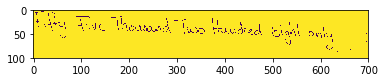

In [88]:
plt.imshow(b)

In [97]:
ret,b = cv2.threshold(b, 200, 255, cv2.THRESH_BINARY)


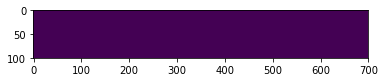

In [98]:
plt.imshow(b)

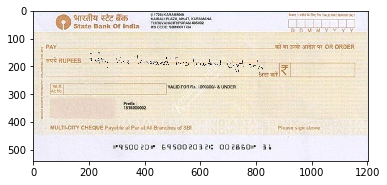

In [99]:
plt.imshow(img_raw)

In [101]:
date_cheque = img_raw[0:100,800:1200]

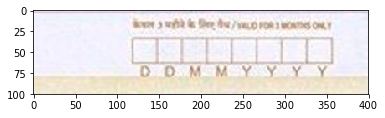

In [102]:
plt.imshow(date_cheque)

In [108]:
micr=img_raw[400:500,230:430][80:,75:190]

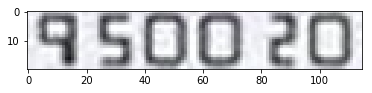

In [110]:
plt.imshow(micr)

In [117]:
word_amt=img_raw[150:250,850:1200][30:90,70:310]

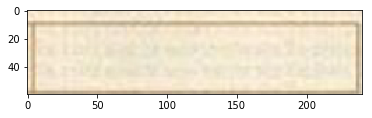

In [118]:
plt.imshow(word_amt)